In [71]:
import pandas as pd



In [192]:
weather = pd.read_csv("local_weather.csv",index_col = "DATE")
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-10,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,6.93,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-11,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,6.93,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-12,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,7.61,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
weather.apply(pd.isnull).sum() / weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.658625
ACSH       0.658625
AWND       0.514458
DAPR       0.999533
FMTM       0.872072
FRGT       0.999883
MDPR       0.999533
PGTM       0.502775
PRCP       0.016415
SNOW       0.335242
SNWD       0.327998
TAVG       0.881009
TMAX       0.000643
TMIN       0.000818
TSUN       0.932765
WDF1       0.658625
WDF2       0.514399
WDF5       0.519540
WDFG       0.750745
WSF1       0.658625
WSF2       0.514341
WSF5       0.519540
WSFG       0.750745
WT01       0.780536
WT02       0.980256
WT03       0.992990
WT04       0.999766
WT05       0.998364
WT07       0.999883
WT08       0.812255
WT09       0.999883
WT16       0.885799
WT18       0.999825
dtype: float64

In [194]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"] #rename columns

In [195]:
core_weather.apply(pd.isnull).sum() #recheck null

precip         281
snow          5739
snow_depth    5615
temp_max        11
temp_min        14
dtype: int64

In [196]:
del core_weather["snow"]

In [197]:
core_weather["snow_depth"].value_counts()

0.0    11504
Name: snow_depth, dtype: int64

In [198]:
del core_weather["snow_depth"]

In [199]:
core_weather

,precip,temp_max,temp_min
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0
...,...,...,...
2022-10-10,0.0,69.0,NaN
2022-10-11,0.0,66.0,NaN
2022-10-12,0.0,68.0,56.0


In [200]:
core_weather[pd.isnull(core_weather["precip"])] #find missing rows

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [201]:
core_weather.loc["1983-10-20":"1983-11-05"]

,precip,temp_max,temp_min
DATE,,,
1983-10-20,0.00,73.0,52.0
1983-10-21,0.00,70.0,50.0
1983-10-22,0.00,70.0,50.0
1983-10-23,0.00,69.0,60.0
1983-10-24,0.00,73.0,58.0
1983-10-25,0.00,75.0,53.0
1983-10-26,0.00,79.0,53.0
1983-10-27,0.00,82.0,56.0
1983-10-28,0.00,74.0,56.0


In [202]:
core_weather["precip"].value_counts()

0.00    13905
0.01      442
0.02      200
0.03      123
0.04      104
        ...  
1.29        1
1.73        1
1.05        1
1.38        1
1.02        1
Name: precip, Length: 176, dtype: int64

In [83]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [84]:
core_weather["precip"]

DATE
1960-01-01    0.0
1960-01-02    0.0
1960-01-03    0.0
1960-01-04    0.0
1960-01-05    0.0
             ... 
2022-10-10    0.0
2022-10-11    0.0
2022-10-12    0.0
2022-10-13    0.0
2022-10-14    0.0
Name: precip, Length: 17119, dtype: float64

In [85]:
core_weather[pd.isnull(core_weather["temp_max"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


In [86]:
core_weather = core_weather.fillna(method = "ffill")

In [87]:
core_weather.value_counts()

precip  temp_max  temp_min
0.00    68.0      56.0        105
        70.0      56.0         94
        68.0      57.0         93
        66.0      55.0         93
        68.0      55.0         91
                             ... 
0.08    53.0      46.0          1
        54.0      42.0          1
                  45.0          1
        55.0      44.0          1
4.53    62.0      57.0          1
Length: 3558, dtype: int64

In [88]:
core_weather.apply(pd.isnull).sum() #find missing values

precip      0
temp_max    0
temp_min    0
dtype: int64

In [89]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [90]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-10-05', '2022-10-06', '2022-10-07', '2022-10-08', '2022-10-09',
       '2022-10-10', '2022-10-11', '2022-10-12', '2022-10-13', '2022-10-14'],
      dtype='object', name='DATE', length=17119)

In [91]:
core_weather.index = pd.to_datetime(core_weather.index)

In [92]:
core_weather.index #look at datatype 

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-10-05', '2022-10-06', '2022-10-07', '2022-10-08',
               '2022-10-09', '2022-10-10', '2022-10-11', '2022-10-12',
               '2022-10-13', '2022-10-14'],
              dtype='datetime64[ns]', name='DATE', length=17119, freq=None)

In [93]:
core_weather.index.year #can find just years useful for monthly average

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=17119)

In [94]:
core_weather.apply(lambda x: (x==9999).sum()) #reading the data documentation 

precip      0
temp_max    0
temp_min    0
dtype: int64

<AxesSubplot:xlabel='DATE'>

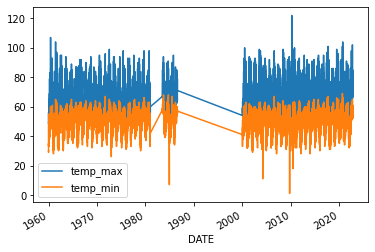

In [95]:
core_weather[["temp_max", "temp_min"]].plot() #missing data 

In [96]:
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    287
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

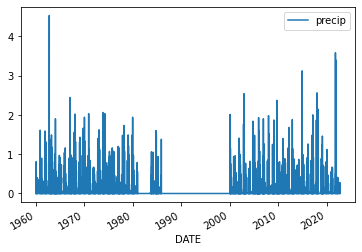

In [97]:
core_weather[["precip"]].plot() #missing data 

In [98]:
core_weather.groupby(core_weather.index.year).sum()

,precip,temp_max,temp_min
DATE,,,
1960,14.01,24135.0,17973.0
1961,13.87,24202.0,17819.0
1962,22.47,23785.0,17880.0
1963,19.11,23470.0,18237.0
1964,16.83,23013.0,18637.0
1965,16.32,23181.0,18715.0
1966,13.11,23680.0,18991.0
1967,23.98,23433.0,18668.0
1968,17.19,23634.0,18859.0


In [99]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]j

In [100]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-10-10,0.0,69.0,54.0,66.0
2022-10-11,0.0,66.0,54.0,68.0
2022-10-12,0.0,68.0,56.0,66.0


In [101]:
core_weather = core_weather.iloc[:-1].copy()

In [102]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-10-09,0.0,72.0,54.0,69.0
2022-10-10,0.0,69.0,54.0,66.0
2022-10-11,0.0,66.0,54.0,68.0


In [103]:
#regression

In [104]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha = 0.1)

In [105]:
predictors = ["precip", "temp_max", "temp_min"]

In [106]:
train = core_weather.loc[:"2020-12-31"]


In [107]:
test = core_weather.loc["2020-12-31":]

In [108]:
test

,precip,temp_max,temp_min,target
DATE,,,,
2020-12-31,0.06,62.0,44.0,60.0
2021-01-01,0.00,60.0,40.0,57.0
2021-01-02,0.14,57.0,51.0,56.0
2021-01-03,0.00,56.0,49.0,62.0
2021-01-04,0.36,62.0,46.0,59.0
...,...,...,...,...
2022-10-09,0.00,72.0,54.0,69.0
2022-10-10,0.00,69.0,54.0,66.0
2022-10-11,0.00,66.0,54.0,68.0


In [109]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [110]:
predictions = reg.predict(test[predictors]) #predicted values of target

In [111]:
from sklearn.metrics import mean_absolute_error

In [112]:
mean_absolute_error(test["target"], predictions) #find residuals 

3.4433360546293987

In [113]:
combined = pd.concat([test["target"], pd.Series(predictions, index = test.index)], axis=1 )

In [114]:
combined.columns = ["actual", "predictions"]

In [115]:
combined

,actual,predictions
DATE,,
2020-12-31,60.0,61.834624
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
...,...,...
2022-10-09,69.0,70.975350
2022-10-10,66.0,68.811935
2022-10-11,68.0,66.648520


<AxesSubplot:xlabel='DATE'>

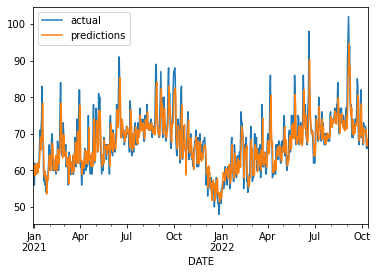

In [116]:
combined.plot()

In [117]:
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

In [156]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2020-12-31":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_absolute_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined
    

In [157]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean() #takes 30 days aat a time and finds mean

In [158]:
core_weather["month_max"]

DATE
1960-05-30          NaN
1960-05-31          NaN
1960-06-01          NaN
1960-06-02          NaN
1960-06-03          NaN
                ...    
2022-10-09    73.166667
2022-10-10    72.933333
2022-10-11    72.533333
2022-10-12    72.433333
2022-10-13    72.333333
Name: month_max, Length: 16968, dtype: float64

In [159]:
core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"] #tells you ave monthly temp for each dat

In [160]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min_ratio
DATE,,,,,,,
1960-05-30,0.0,76.0,51.0,77.0,NaN,NaN,1.490196
1960-05-31,0.0,77.0,52.0,90.0,NaN,NaN,1.480769
1960-06-01,0.0,90.0,57.0,107.0,NaN,NaN,1.578947
1960-06-02,0.0,107.0,60.0,84.0,NaN,NaN,1.783333
1960-06-03,0.0,84.0,56.0,74.0,NaN,NaN,1.500000
...,...,...,...,...,...,...,...
2022-10-09,0.0,72.0,54.0,69.0,73.166667,1.016204,1.333333
2022-10-10,0.0,69.0,54.0,66.0,72.933333,1.057005,1.277778
2022-10-11,0.0,66.0,54.0,68.0,72.533333,1.098990,1.222222


In [161]:
core_weather["max_min_ratio"] = core_weather["temp_max"] / core_weather["temp_min"] #ratio bw hot and cold weather per day

In [162]:
predictors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min_ratio"]

In [163]:
core_weather = core_weather.iloc[30:,:].copy()

In [164]:
error, combined= create_predictions(predictors, core_weather, reg)

In [167]:
error

3.3777605320913864

<AxesSubplot:xlabel='DATE'>

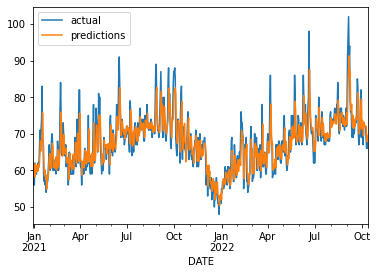

In [168]:
combined.plot()

In [181]:
#add more predictors

In [182]:
core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

#pretty cooll.. tells you the average temp for a given month on a rolling basis expanind by one every teim 
#Month - calculates average of every month on a rolling basis by including previous days data as well
#Day - calculates averages of a given day of the year, slowly adding averages as it grows 


In [183]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min_ratio,monthly_avg,day_of_year_avg
DATE,,,,,,,,,
1960-06-29,0.0,65.0,53.0,62.0,75.333333,1.158974,1.226415,65.000000,65.000000
1960-06-30,0.0,62.0,54.0,68.0,74.833333,1.206989,1.148148,63.500000,62.000000
1960-07-01,0.0,68.0,54.0,72.0,74.100000,1.089706,1.259259,68.000000,68.000000
1960-07-02,0.0,72.0,51.0,78.0,72.933333,1.012963,1.411765,70.000000,72.000000
1960-07-03,0.0,78.0,55.0,69.0,72.733333,0.932479,1.418182,72.666667,78.000000
...,...,...,...,...,...,...,...,...,...
2022-10-09,0.0,72.0,54.0,69.0,73.166667,1.016204,1.333333,70.567247,71.510638
2022-10-10,0.0,69.0,54.0,66.0,72.933333,1.057005,1.277778,70.566156,70.191489
2022-10-11,0.0,66.0,54.0,68.0,72.533333,1.098990,1.222222,70.562978,69.659574


In [184]:
predictors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min_ratio", "monthly_avg","day_of_year_avg" ]

In [185]:
error, combined= create_predictions(predictors, core_weather, reg)
error

3.338682252955608

In [188]:
reg.coef_

array([ -0.91563633,   0.40472042,   0.03097535,   0.32800864,
       -15.69294291,   0.04897682,   0.15135323,   0.07882747])

In [189]:
core_weather.corr()["target"]

precip            -0.205721
temp_max           0.821869
temp_min           0.596193
target             1.000000
month_max          0.688459
month_day_max     -0.420467
max_min_ratio      0.044985
monthly_avg        0.692883
day_of_year_avg    0.714922
Name: target, dtype: float64

In [190]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [191]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
DATE,,,
2022-06-20,98.0,76.766973,21.233027
2022-05-23,86.0,69.862700,16.137300
2021-01-17,83.0,68.561882,14.438118
2022-09-03,91.0,76.722121,14.277879
2022-09-05,102.0,87.793358,14.206642
2021-05-07,81.0,67.795377,13.204623
2021-04-01,62.0,75.198457,13.198457
2022-03-21,78.0,65.000312,12.999688
2021-02-22,84.0,71.166639,12.833361
